In [2]:
from keras.datasets import imdb

import numpy as np

# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 자주 나타나는 단어 1만 개만 사용

# 정수 시퀀스를 이진 행렬로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듦
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

x_train[0]

# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [13]:
# 신경망 모델 만들기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
from keras import losses
from keras import metrics

# 모델 컴파일 하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])



In [14]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val) )

history_dict=history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.5172 - binary_accuracy: 0.7984 - val_loss: 0.3971 - val_binary_accuracy: 0.8680
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3214 - binary_accuracy: 0.9005 - val_loss: 0.3347 - val_binary_accuracy: 0.8694
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2369 - binary_accuracy: 0.9260 - val_loss: 0.2837 - val_binary_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1848 - binary_accuracy: 0.9400 - val_loss: 0.2732 - val_binary_accuracy: 0.8897
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1507 - binary_accuracy: 0.9511 - val_loss: 0.2886 - val_binary_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1248 - binary_accuracy: 0.9617 - val_loss: 0.2879 - val_bi

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

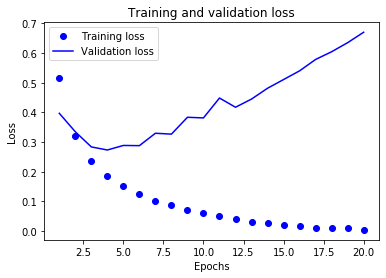

In [17]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# 'bo'는 파란색 점을 의미
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

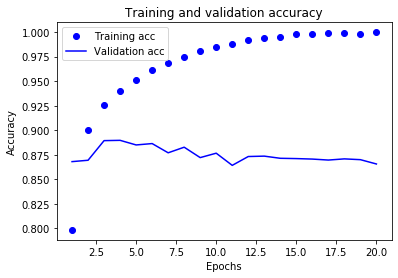

In [18]:
plt.clf() # 그래프를 초기화
acc = history_dict['binary_accuracy']
val_acc =history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo',label='Training acc' )
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()